In [4]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lb
import sounddevice as sd
from Griffin_Lim import *

## Audios importados

In [8]:
voice, fs1 = lb.load('voice.wav') 
bosque, fs2 = lb.load('bosque.wav')
guitarra, fs3 = lb.load('guitarra.wav')

## Creacion senial de 5 tono 

In [12]:
fs = 44100
n = np.linspace(0,10,fs)

tonos = np.sin(2*np.pi*100*n) + np.sin(2*np.pi*260*n) + np.sin(2*np.pi*588*n) + np.sin(2*np.pi*878*n) +np.sin(2*np.pi*1206*n)

## Implementacion de algoritmo

In [13]:
t1,voice_aprox = griffin_lim(voice,fs1,10)
t2,bosque_aprox = griffin_lim(bosque,fs2,10)
t3,guitarra_aprox = griffin_lim(guitarra,fs3,10)
t4,tonos_aprox = griffin_lim(tonos,fs,10)

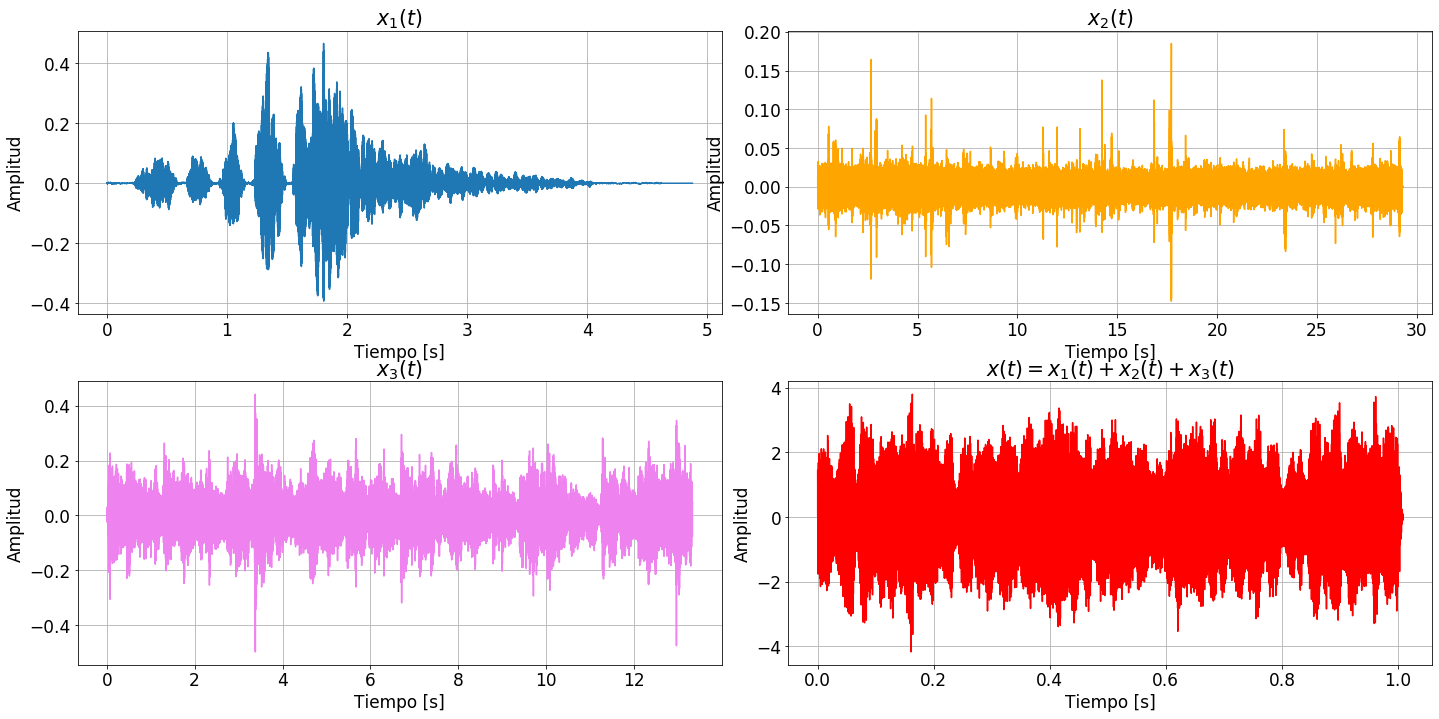

In [20]:
plt.rcParams.update({'font.size': 17})
fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, figsize=[20, 10])
axs[0, 0].plot(t1, voice_aprox)
axs[0, 0].set_title('$x_1(t)$')
axs[0, 1].plot(t2, bosque_aprox, color='orange')
axs[0, 1].set_title('$x_2(t)$')
axs[1, 0].plot(t3, guitarra_aprox,color='violet')
axs[1, 0].set_title('$x_3(t)$')
axs[1, 1].plot(t4, tonos_aprox, color='red')
axs[1, 1].set_title('$x(t) = x_1(t) + x_2(t) + x_3(t)$')
fig.tight_layout()

axs.flat[0].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[1].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[2].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[3].set(ylabel='Amplitud', xlabel='Tiempo [s]')

for ax in axs.flat:
    ax.grid()

In [ ]:
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(1, 1, sharex=False, sharey=False, figsize=[20, 10])
axs.plot(wr_analogico/np.pi,abs(fil_analogico),color ='red')
axs.set_title('Magnitud del Filtro analogico')
axs.grid()
axs.axvline((8/35),color ='royalblue') # Final de la banda de paso
axs.axvline((15/35),color ='royalblue') # Incicio de la banda de atenuacion
axs.axhline(Gp,color='green',ls='--') # Ganacia en la banda de paso
axs.axhline(Gs,color='green',ls='--') # Ganancia en la banda de atenuacion
axs.set_xticks(np.round([wp_analogico/np.pi,1,ws_analogico/np.pi,1.75,2,2.5,3],2))
axs.set_yticks([0,0.1,0.2,Gs,0.4,0.5,0.6,0.7,Gp,0.9,1])
axs.set(ylabel='Amplitud', xlabel='Frecuencia angular [Radianes]')